In [ ]:
!gdown --id 1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
!mv _sqlite3.cpython-37m-x86_64-linux-gnu.so /usr/lib/python3.7/lib-dynload/
import os
os.kill(os.getpid(), 9)

Downloading...
From: https://drive.google.com/uc?id=1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
To: /content/_sqlite3.cpython-37m-x86_64-linux-gnu.so
6.23MB [00:00, 199MB/s]


In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect('db')

In [ ]:
cur = con.cursor()

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

Работа с данными  

предположим в июле провели специальную акцию, направленную на улучшение ретеншена. Новым юзерам слали письмо с купоном. Сработала ли акция?


https://drive.google.com/file/d/18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K/view?usp=sharing


сделать можно на питоне в юпитер или экселе или в гугл шите, даже можете в sql сделать, как удобнее.

обратно нужно дать файл с формулами или кодом и описание того, как получился результат поэтапно.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
! gdown --id 18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K

Downloading...
From: https://drive.google.com/uc?id=18CZKLXpbZfR44SunmzSuFvc0kI9U8n_K
To: /content/analyst_test_transactions_db.csv
3.07MB [00:00, 97.6MB/s]


In [ ]:
df = pd.read_csv('/content/analyst_test_transactions_db.csv')

In [ ]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984


In [ ]:
len(df)

76857

In [ ]:
df['reg_date'].agg(['min','max'])

min    1900-01-01
max    2015-11-20
Name: reg_date, dtype: object

In [ ]:
df.dtypes

user_id               int64
order_id            float64
reg_date             object
transaction_date     object
revenue               int64
dtype: object

In [ ]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

In [ ]:
df['reg_date'].agg(['min','max'])

min   1900-01-01
max   2015-11-20
Name: reg_date, dtype: datetime64[ns]

In [ ]:
df['reg_month'] = df['reg_date'].astype('datetime64[M]')

In [ ]:
df.groupby(['reg_month'])['user_id'].agg(['count','nunique'])

,count,nunique
reg_month,,
1900-01-01,53,53
2012-02-01,9,9
2012-03-01,362,361
2012-04-01,370,370
2012-05-01,301,301
2012-06-01,445,443
2012-07-01,370,369
2012-08-01,271,269
2012-09-01,356,355


In [ ]:
df['transaction_month'] = df['transaction_date'].astype('datetime64[M]')

In [ ]:
df.groupby(['transaction_month'])['user_id'].agg(['count','nunique'])

,count,nunique
transaction_month,,
2015-01-01,4058,3951
2015-02-01,4932,4777
2015-03-01,5824,5599
2015-04-01,6102,5862
2015-05-01,6339,6063
2015-06-01,6829,6480
2015-07-01,7520,7166
2015-08-01,8598,8110
2015-09-01,8468,7964


In [ ]:
df['user_id'].nunique()

48214

In [ ]:
len(df.groupby(['reg_month'])['user_id'].agg(['count','nunique']))

47

In [ ]:
48214 * 47

2266058

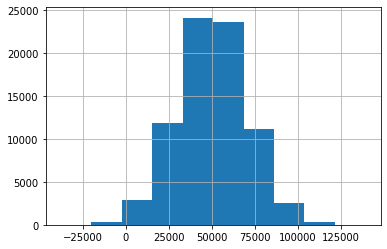

In [ ]:
df['user_id'].hist()

In [ ]:
df[df['user_id']<0]

,user_id,order_id,reg_date,transaction_date,revenue,reg_month,transaction_month
117,-7670,84002.0,2015-02-09,2015-02-22,808,2015-02-01,2015-02-01
144,-4741,141322.0,2015-06-15,2015-10-07,728,2015-06-01,2015-10-01
339,-16994,22456.0,2015-06-13,2015-07-25,878,2015-06-01,2015-07-01
380,-6927,157109.0,2015-02-07,2015-06-12,727,2015-02-01,2015-06-01
503,-5446,74254.0,2014-08-08,2015-03-05,711,2014-08-01,2015-03-01
...,...,...,...,...,...,...,...
76104,-10718,85345.0,2014-09-12,2015-09-25,783,2014-09-01,2015-09-01
76133,-2931,137163.0,2014-11-30,2015-05-13,952,2014-11-01,2015-05-01
76302,-2156,78342.0,2014-09-15,2015-03-11,834,2014-09-01,2015-03-01
76585,-5397,30581.0,2012-03-11,2015-11-20,1054,2012-03-01,2015-11-01


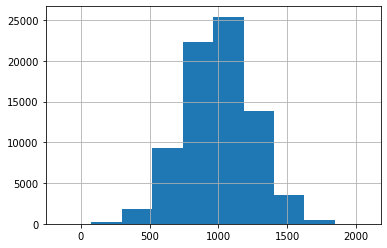

In [ ]:
df['revenue'].hist()

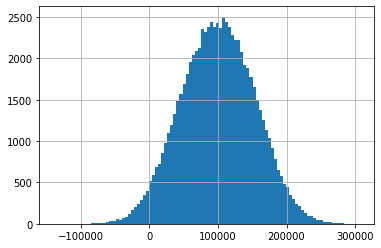

In [ ]:
df['order_id'].hist(bins=100)

In [ ]:
user = df.groupby('user_id')['reg_month'].min().reset_index()

In [ ]:
user

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01
...,...,...
48209,128964,2015-10-01
48210,130617,2015-02-01
48211,131071,2012-04-01
48212,132484,2015-06-01


In [ ]:
len(df.groupby(['transaction_month'])['user_id'].agg(['count','nunique']))

11

In [ ]:
min_date = df['transaction_month'].min()
max_date = df['transaction_month'].max()

In [ ]:
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))

In [ ]:
month.columns = ['month']

In [ ]:
user['key'] = 1
month['key'] = 1

In [ ]:
template = user.merge(month,on='key')[['user_id','reg_month','month']]

In [ ]:
len(template)

530354

In [ ]:
template = template[template['month'] >= template['reg_month']]

In [ ]:
template

,user_id,reg_month,month
0,-37599,2015-01-01,2015-01-01
1,-37599,2015-01-01,2015-02-01
2,-37599,2015-01-01,2015-03-01
3,-37599,2015-01-01,2015-04-01
4,-37599,2015-01-01,2015-05-01
...,...,...,...
530349,138987,2014-10-01,2015-07-01
530350,138987,2014-10-01,2015-08-01
530351,138987,2014-10-01,2015-09-01
530352,138987,2014-10-01,2015-10-01


In [ ]:
trans_month = df.groupby(['user_id','transaction_month'])['revenue'].sum().reset_index()

In [ ]:
trans_month.columns = ['user_id','month','revenue']

In [ ]:
report = template.merge(trans_month,on=['user_id','month'],how='left')

In [ ]:
report['active'] = (report['revenue'] > 0)*1

In [ ]:
report

,user_id,reg_month,month,revenue,active
0,-37599,2015-01-01,2015-01-01,NaN,0
1,-37599,2015-01-01,2015-02-01,NaN,0
2,-37599,2015-01-01,2015-03-01,1182.0,1
3,-37599,2015-01-01,2015-04-01,NaN,0
4,-37599,2015-01-01,2015-05-01,NaN,0
...,...,...,...,...,...
467620,138987,2014-10-01,2015-07-01,NaN,0
467621,138987,2014-10-01,2015-08-01,NaN,0
467622,138987,2014-10-01,2015-09-01,NaN,0
467623,138987,2014-10-01,2015-10-01,NaN,0


In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='count')

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0,53.0
2012-02-01,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2012-03-01,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0,361.0
2012-04-01,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0,369.0
2012-05-01,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0
2012-06-01,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0,436.0
2012-07-01,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0,359.0
2012-08-01,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0,264.0
2012-09-01,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0,345.0


In [ ]:
report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='sum')

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,8.0,9.0,18.0,8.0,9.0,13.0,6.0,5.0,5.0,9.0,5.0
2012-02-01,1.0,2.0,1.0,0.0,4.0,2.0,2.0,2.0,2.0,0.0,2.0
2012-03-01,53.0,57.0,45.0,55.0,53.0,66.0,61.0,70.0,64.0,106.0,58.0
2012-04-01,54.0,51.0,85.0,62.0,62.0,63.0,63.0,61.0,65.0,89.0,66.0
2012-05-01,29.0,47.0,50.0,56.0,56.0,54.0,53.0,74.0,52.0,63.0,54.0
2012-06-01,51.0,62.0,64.0,90.0,75.0,70.0,71.0,69.0,86.0,106.0,77.0
2012-07-01,49.0,51.0,55.0,63.0,60.0,55.0,65.0,69.0,53.0,94.0,67.0
2012-08-01,21.0,40.0,49.0,53.0,40.0,40.0,51.0,57.0,54.0,66.0,50.0
2012-09-01,54.0,45.0,53.0,66.0,57.0,59.0,50.0,60.0,57.0,67.0,50.0


In [ ]:
retention = report.pivot_table(index='reg_month',columns='month',values='active',aggfunc='mean')

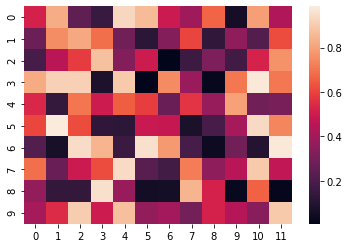

In [ ]:
import numpy as np
import seaborn as sns
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [ ]:
sns.set(font_scale=2,style="whitegrid",rc={'figure.figsize':(12,6)} )

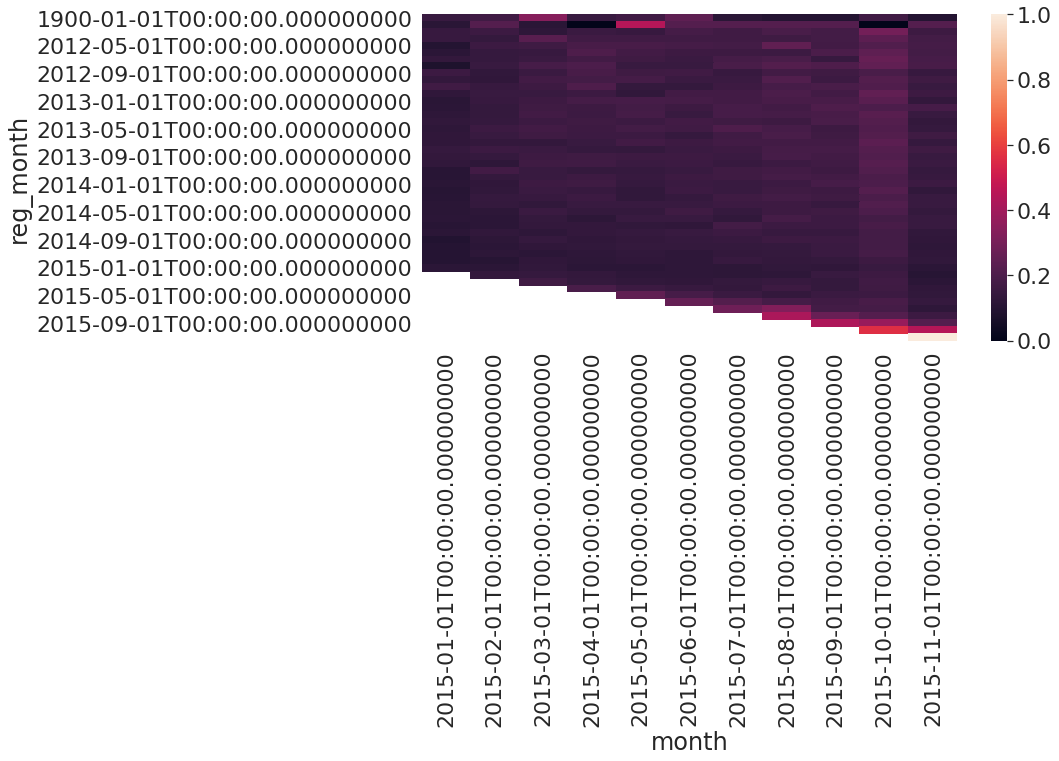

In [ ]:
sns.heatmap(retention)

In [ ]:
retention

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
1900-01-01,0.150943,0.169811,0.339623,0.150943,0.169811,0.245283,0.113208,0.094340,0.094340,0.169811,0.094340
2012-02-01,0.111111,0.222222,0.111111,0.000000,0.444444,0.222222,0.222222,0.222222,0.222222,0.000000,0.222222
2012-03-01,0.146814,0.157895,0.124654,0.152355,0.146814,0.182825,0.168975,0.193906,0.177285,0.293629,0.160665
2012-04-01,0.146341,0.138211,0.230352,0.168022,0.168022,0.170732,0.170732,0.165312,0.176152,0.241192,0.178862
2012-05-01,0.097315,0.157718,0.167785,0.187919,0.187919,0.181208,0.177852,0.248322,0.174497,0.211409,0.181208
2012-06-01,0.116972,0.142202,0.146789,0.206422,0.172018,0.160550,0.162844,0.158257,0.197248,0.243119,0.176606
2012-07-01,0.136490,0.142061,0.153203,0.175487,0.167131,0.153203,0.181058,0.192201,0.147632,0.261838,0.186630
2012-08-01,0.079545,0.151515,0.185606,0.200758,0.151515,0.151515,0.193182,0.215909,0.204545,0.250000,0.189394
2012-09-01,0.156522,0.130435,0.153623,0.191304,0.165217,0.171014,0.144928,0.173913,0.165217,0.194203,0.144928


In [ ]:
report['lifetime'] = ((report['month'] - report['reg_month'])/np.timedelta64(1, 'M')).round().astype(int)

In [ ]:
report[report['user_id'] == 128006]

,user_id,reg_month,month,revenue,active,lifetime
467563,128006,2015-01-01,2015-01-01,NaN,0,0
467564,128006,2015-01-01,2015-02-01,539.0,1,1
467565,128006,2015-01-01,2015-03-01,NaN,0,2
467566,128006,2015-01-01,2015-04-01,NaN,0,3
467567,128006,2015-01-01,2015-05-01,NaN,0,4
467568,128006,2015-01-01,2015-06-01,NaN,0,5
467569,128006,2015-01-01,2015-07-01,NaN,0,6
467570,128006,2015-01-01,2015-08-01,NaN,0,7
467571,128006,2015-01-01,2015-09-01,NaN,0,8
467572,128006,2015-01-01,2015-10-01,NaN,0,9


In [ ]:
report['reg_month_str'] = report['reg_month'].dt.strftime('%Y-%m')

In [ ]:
retention = report[report['reg_month'] >= '2015-01-01'].pivot_table(index='reg_month',columns='lifetime',values='active',aggfunc='mean')

In [ ]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


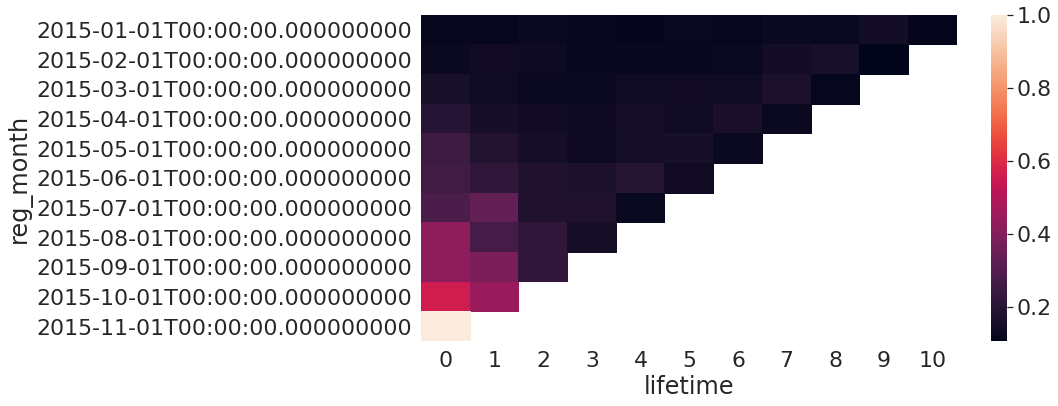

In [ ]:
sns.heatmap(retention)

# SQL

In [ ]:
df = pd.read_csv('/content/analyst_test_transactions_db.csv')

In [ ]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

In [ ]:
df.to_sql('trans',con,index=False,if_exists='replace')

In [ ]:
sql = ''' select * from trans t'''

In [ ]:
select(sql)

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22 00:00:00,2015-07-16 00:00:00,1088
1,40047,81824.0,2013-11-24 00:00:00,2015-01-19 00:00:00,1027
2,48153,144851.0,2015-07-03 00:00:00,2015-10-29 00:00:00,601
3,54591,116111.0,2013-07-12 00:00:00,2015-04-30 00:00:00,881
4,39789,134943.0,2013-05-25 00:00:00,2015-07-21 00:00:00,984
...,...,...,...,...,...
76852,36921,163682.0,2015-01-15 00:00:00,2015-03-28 00:00:00,1095
76853,31360,145146.0,2015-01-04 00:00:00,2015-08-09 00:00:00,547
76854,56195,8929.0,2012-09-18 00:00:00,2015-11-12 00:00:00,850
76855,46362,78673.0,2015-02-20 00:00:00,2015-07-21 00:00:00,356


In [ ]:
sql = ''' select t.user_id, date(min(reg_date),'start of month') as reg_month from trans t
group by t.user_id'''

In [ ]:
select(sql)

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01
...,...,...
48209,128964,2015-10-01
48210,130617,2015-02-01
48211,131071,2012-04-01
48212,132484,2015-06-01


In [ ]:
min = '''select date(min(t.transaction_date),'start of month') from trans t'''

In [ ]:
select(min)

,"date(min(t.transaction_date),'start of month')"
0,2015-01-01


In [ ]:
max = '''select date(max(t.transaction_date),'start of month') from trans t'''

In [ ]:
select(max)

,"date(max(t.transaction_date),'start of month')"
0,2015-11-01


In [ ]:
sql = f'''WITH RECURSIVE dates(date) AS (
  VALUES(({min}))
  UNION ALL
  SELECT date(date, '+1 month')
  FROM dates
  WHERE date < ({max})
)
SELECT date FROM dates;'''

In [ ]:
select(sql)

,date
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [ ]:
sql = f'''with users as  (select t.user_id, date(min(reg_date),'start of month') as reg_month from trans t
group by t.user_id),

dates as (

WITH RECURSIVE dates(date) AS (
  VALUES(({min}))
  UNION ALL
  SELECT date(date, '+1 month')
  FROM dates
  WHERE date < ({max})
)
SELECT date FROM dates

),

template as (

select t.user_id, t.reg_month, d.date as month from users t
join dates d on d.date >= t.reg_month),

trans_month as (

select t.user_id,
date(t.transaction_date,'start of month') as month,

sum(t.revenue) as revenue_sum,
count(1) as transaction_cnt


 from trans t

 group by
t.user_id,
date(t.transaction_date,'start of month')

),

report as (
select t.*, tm.revenue_sum, tm.transaction_cnt,
case when tm.revenue_sum > 0 then 1 else 0 end as active,

round((julianday(t.month) - julianday(t.reg_month)) / 30) as lifetime

 from template t
left join trans_month tm on t.user_id = tm.user_id and t.month = tm.month)


select t.reg_month, t.lifetime, avg(t.active) as retention from report t
where t.reg_month >= '2015-01-01'
group by t.reg_month, t.lifetime

'''

In [ ]:
t = select(sql)

In [ ]:
t.pivot_table(index='reg_month',columns='lifetime',values='retention',aggfunc='max')

lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
retention

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03-01,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04-01,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05-01,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06-01,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07-01,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
